In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.datasets import fetch_openml
from tqdm import tqdm

## Loading the datasets

**MNIST Dataset**

In [4]:
mnist = fetch_openml("mnist_784", version=1)
mnist_images = mnist.data.values.reshape(-1, 28, 28)  
mnist_labels = mnist.target.astype(int)

**COIL-20 Dataset**

In [5]:
import kagglehub

coil_path = kagglehub.dataset_download("cyx6666/coil20")

/home/aries/.conda/envs/git-2d/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def load_coil20(dataset_path):
    images, labels = [], []
    path = os.path.join(dataset_path, "coil-20")
    for folder in tqdm(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        files = os.listdir(folder_path)
        files.sort(key=lambda x: int(x.split("__")[1].split(".")[0]))
        for filename in files:
            img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            label = filename.split("__")[0].replace(f"obj", "")
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels) 

coil_images, coil_labels = load_coil20(coil_path)

100%|██████████| 20/20 [00:01<00:00, 11.97it/s]


Let us now plot the images from the datasets

## Plotting the Datasets

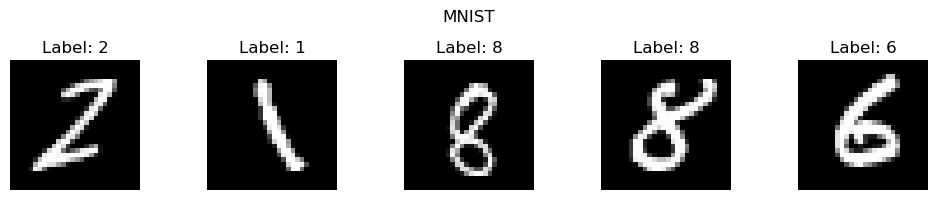

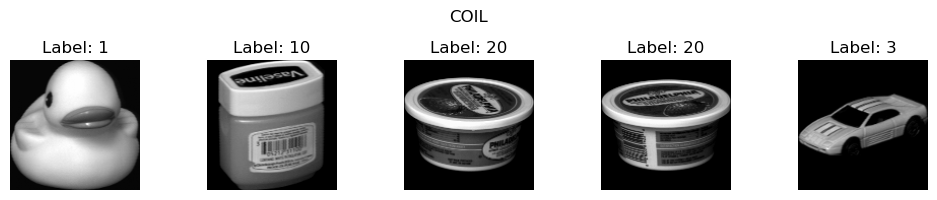

In [7]:
def plot_images(images, labels, title):
    indices = np.random.choice(len(images), size=5, replace=False)
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[indices[i]], cmap="gray")
        ax.set_title(f"Label: {labels[indices[i]]}")
        ax.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_images(mnist_images, mnist_labels, "MNIST")
plot_images(coil_images, coil_labels, "COIL")

## Animations

### COIL-20 

We will now display the objects of coil-20 animated using the `animation` module in matplotlib

In [8]:
from matplotlib import animation
from IPython.display import Image

As our labels are all flattened within a 1d array. We can sort through the images by checking the index at which the image label changes.

In [9]:
coil_indexes = [0] + [i+1 for i in range(len(coil_labels)-1) if coil_labels[i] != coil_labels[i+1]] + [len(coil_labels)]

We first create the images using the animation library, then direct all output to the `gifs/` folder. Let us consider the image class 16 of the lucky cat for instance.

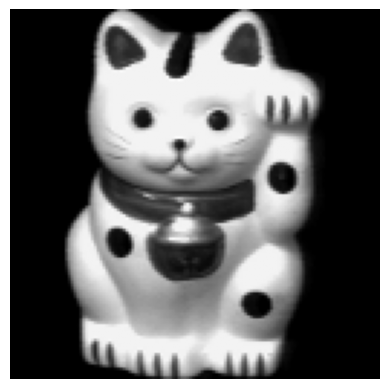

In [10]:
i = 16
start_idx = coil_indexes[i]
end_idx = coil_indexes[i+1]
coil_sequence = coil_images[start_idx:end_idx]

fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(coil_sequence[0], cmap="gray")

def update(frame):
    im.set_array(coil_sequence[frame])
    return [im]

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(coil_sequence),
    interval=100,
    blit=False
)
output_dir = "gifs"
os.makedirs(output_dir, exist_ok=True)
ani.save(f"{output_dir}/coil_animation{i}.gif", writer="pillow", fps=10)


This gives us the following gif:

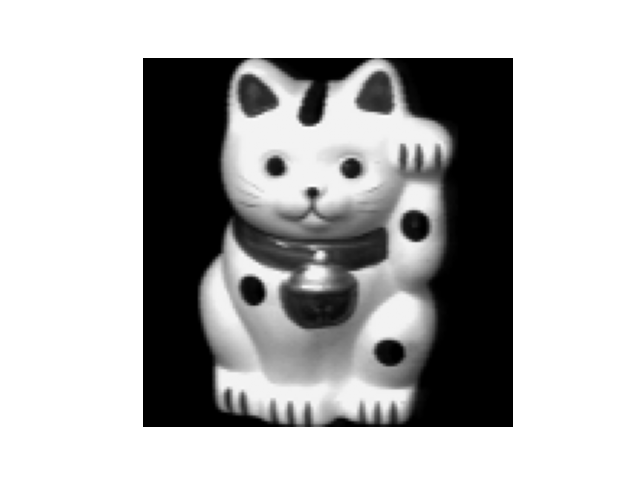

In [11]:
Image(filename=f"{output_dir}/coil_animation16.gif")

### MNIST

Operating nearly the same way, let us pick the number 7 from the MNIST dataset and display its different image classes.

In [12]:
n = 7
mnist_sequence = [mnist_images[i] for i in range(len(mnist_labels)) if mnist_labels[i] == n]
# limit the sequence to only 100 images
mnist_sequence = mnist_sequence[:100]

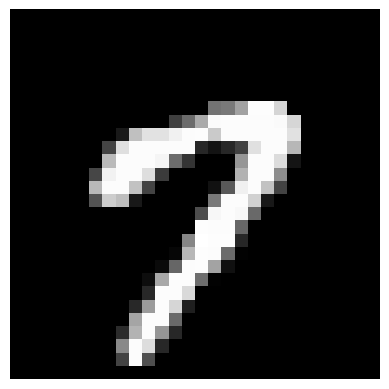

In [13]:
fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(mnist_sequence[0], cmap="gray")

def update(frame):
    im.set_array(mnist_sequence[frame])
    return [im]

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(mnist_sequence),
    interval=100,
    blit=False
)

ani.save(f"{output_dir}/mnist_animation{n}.gif", writer="pillow", fps=10)

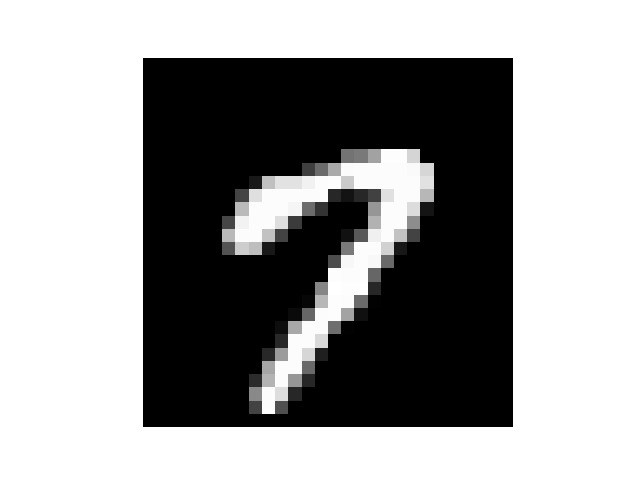

In [14]:
Image(filename=f"{output_dir}/mnist_animation7.gif")

## Restructuring and Data Visualization

### Structure

In [15]:
# flattening the images:
mnist_flat = mnist_images.reshape(mnist_images.shape[0], -1)
coil_flat = coil_images.reshape(coil_images.shape[0], -1)

# fit within pandas dataframes with labels
mnist_df = pd.DataFrame(mnist_flat)
mnist_df['label'] = mnist_labels

coil_df = pd.DataFrame(coil_flat)
coil_df['label'] = coil_labels

In [16]:
print(f"MNIST shape: {mnist_df.shape}")
display(mnist_df.head())
print(f"COIL shape: {coil_df.shape}")
display(coil_df.head())

MNIST shape: (70000, 785)


0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

COIL shape: (1440, 16385)


0  1  2  3  4  5  6  7  8  9  ...  16375  16376  16377  16378  16379  \
0  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

   16380  16381  16382  16383  label  
0      0      0      0      0      8  
1      0      0      0      0      8  
2      0      0      0      0      8  
3      0      0      0      0      8  
4      0      0      0      0      8  

[5 rows x 16385 columns]

In order to help with visualization, we need to go a step further and normalize our data using scikit-learn's `Standard Scaler`

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mnist_normalized = scaler.fit_transform(mnist_flat)
coil_normalized = scaler.fit_transform(coil_flat)

### Data Visualization

#### Heatmaps

In [18]:
import seaborn as sns

We can start by working on defining how this normalized data should be mapped. 

One approach, suggested by the assignment, is to use the `z-score` which relies on the mean of the images of each class and compares how each image within that class fits into it. 



In [19]:
from sklearn.preprocessing import StandardScaler

def compute_class_means(normalized_data, labels, unique_labels, image_shape):
    class_means = []
    for label in unique_labels:
        mask = labels == label
        class_data = normalized_data[mask]
        class_mean = np.mean(class_data, axis=0)
        class_means.append(class_mean.reshape(image_shape))
    return class_means
    
def plot_class_heatmaps(normalized_data, labels, class_names, image_shape, title, nrows, ncols):
    unique_labels = np.unique(labels)
    n_classes = len(unique_labels)
    class_means = compute_class_means(normalized_data, labels, unique_labels, image_shape)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3*nrows))
    for i, ax in enumerate(axes.flat):
        if i < n_classes:
            sns.heatmap(class_means[i], ax=ax, cmap='RdBu', center=0, cbar=False)
            ax.set_title(f"{class_names[i]}")
            ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

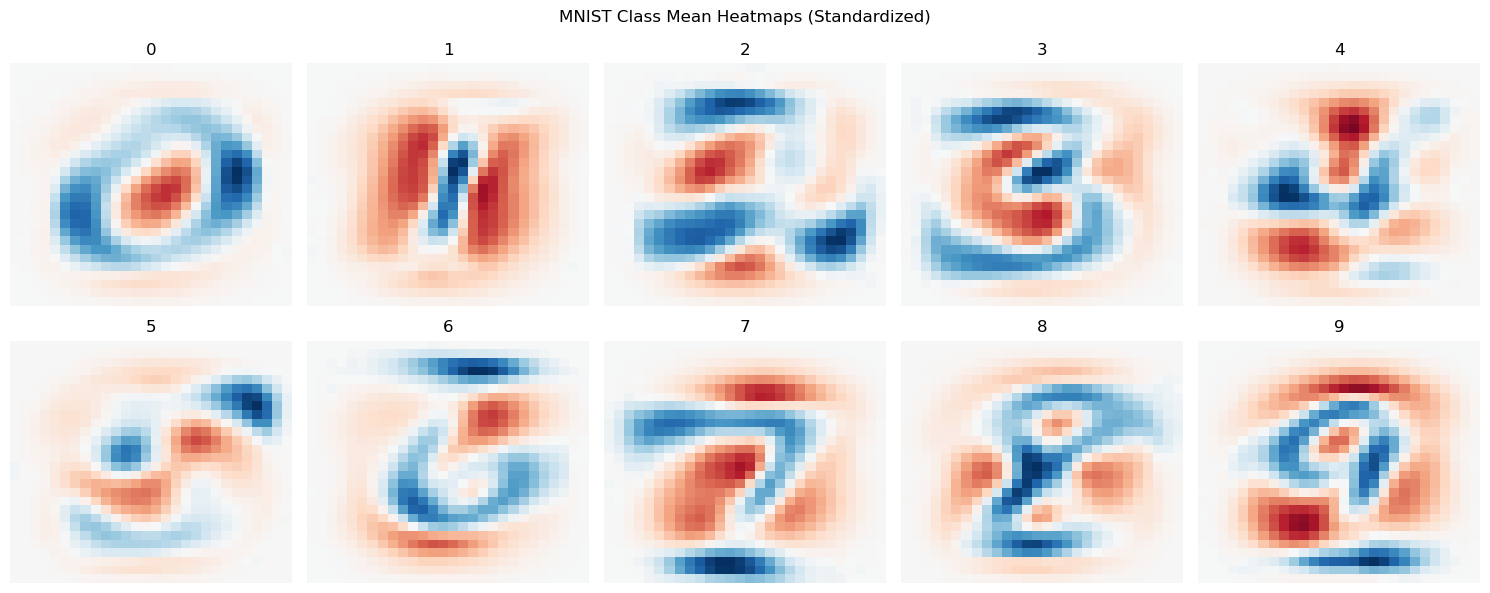

In [20]:
# MNIST Heatmaps
mnist_class_names = [str(i) for i in range(10)]
plot_class_heatmaps(mnist_normalized, mnist_labels, mnist_class_names, (28, 28), 
                    "MNIST Class Mean Heatmaps (Standardized)", 2, 5)

Patterns are already starting to emerge, as we notice the images of each class have certain lines that always overlap for the **MNIST** dataset.

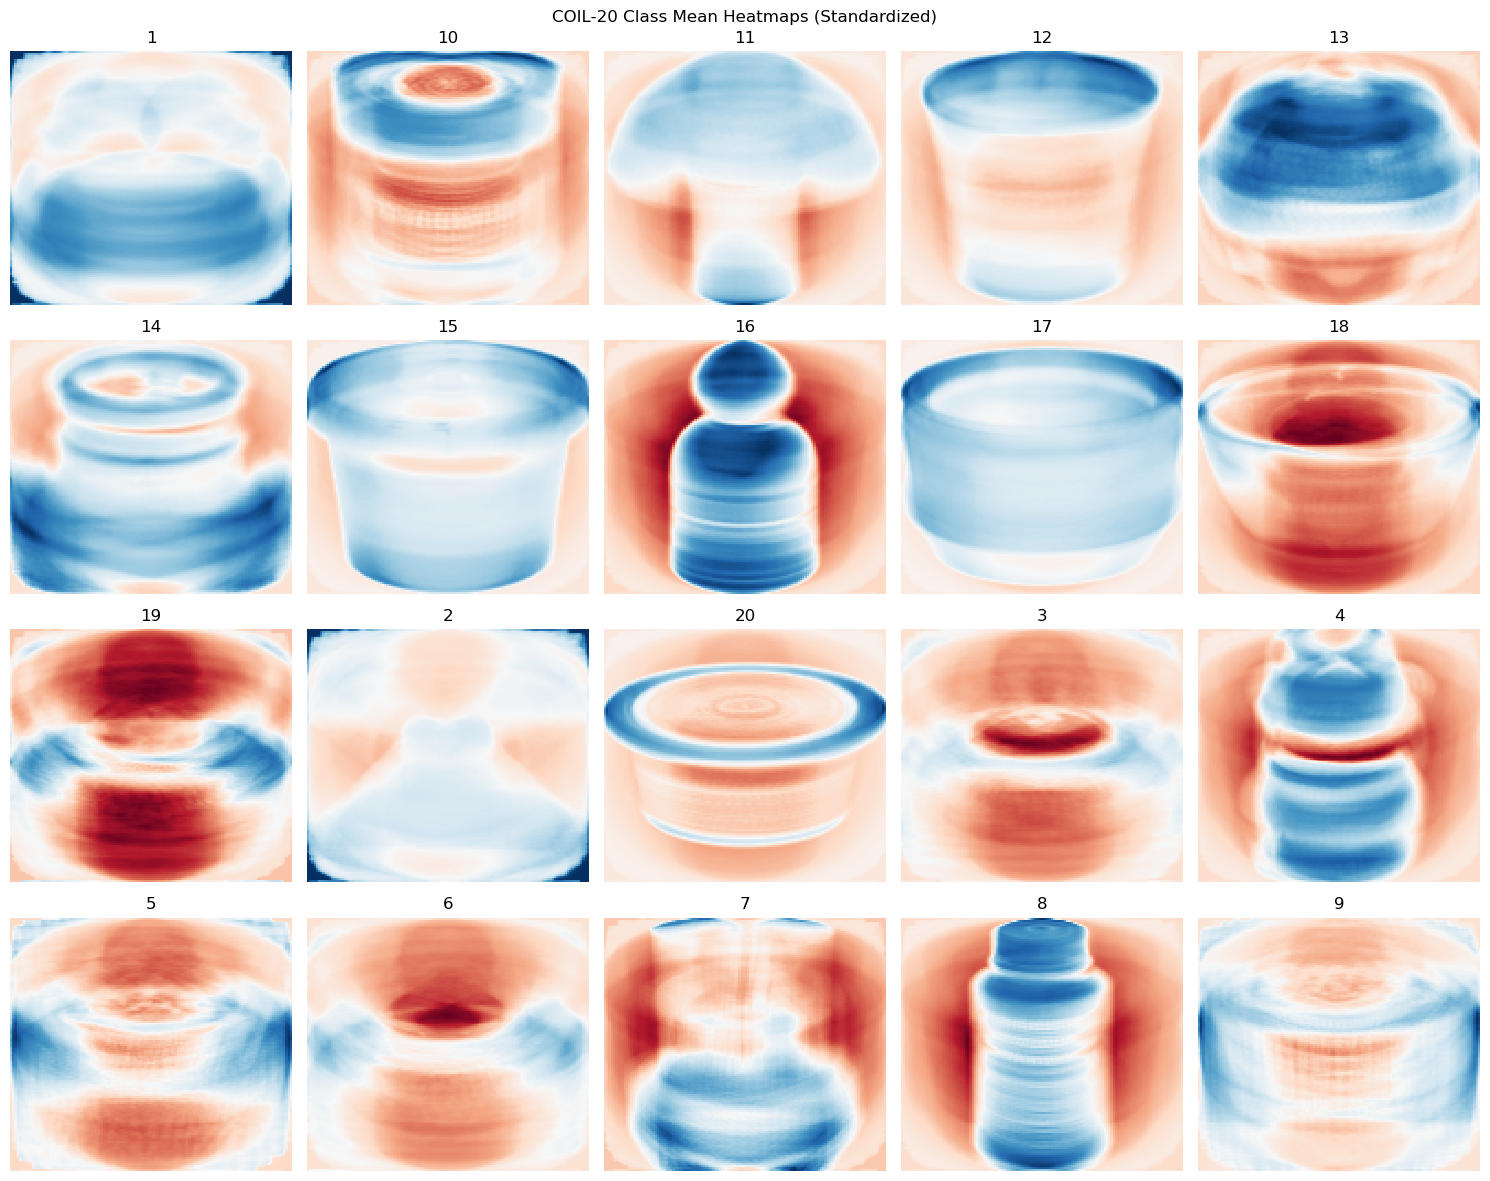

In [21]:
# COIL-20 Heatmaps 
coil_class_names = np.unique(coil_labels)
plot_class_heatmaps(coil_normalized, coil_labels, coil_class_names, (128, 128), 
                    "COIL-20 Class Mean Heatmaps (Standardized)", 4, 5)

The rotation effect of the coil-20 images can be clearly perceived with these heatmaps, the setback however is that certain shapes seem to overlap, especially the overtly simple cylindrical shapes.

#### Parallel Plots

There was an initial trial at modelling all 70000 samples of the data- That caused my laptop to crash twice. For that reason we will be modelling only a sample of the data for the `mnist` dataset.

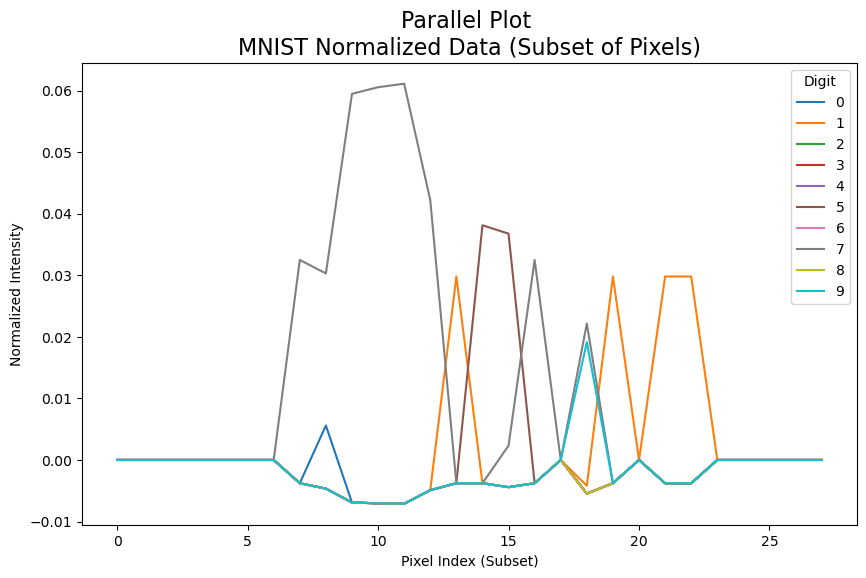

In [ ]:
subset_idx = np.random.choice(mnist_normalized.shape[0], 100, replace=False)
mnist_subset = mnist_normalized[subset_idx]

# average pixel intensities per class to avoid overcrowding
unique_labels = np.unique(mnist_labels)
class_means = np.array([mnist_normalized[mnist_labels == label].mean(axis=0) for label in unique_labels])

# selecting a subset of pixels 
selected_features = np.arange(0, 784, 28)
class_means_subset = class_means[:, selected_features]

# converting to pandas dataframe for optimized rendering
df = pd.DataFrame(class_means_subset.T, columns=unique_labels)

plt.figure(figsize=(10, 6))
parallel_plot = sns.lineplot(data=df, dashes=False, markers=False)

plt.title('Parallel Plot \nMNIST Normalized Data (Subset of Pixels)', fontsize=16)
plt.xlabel("Pixel Index (Subset)")
plt.ylabel("Normalized Intensity")
plt.legend(title='Digit', bbox_to_anchor=(1, 1))  # Shift legend to the right
plt.show()

The pixel classes are largely situated in the middle, which is logical considering the heatmaps we observed earlier of the mnist images.

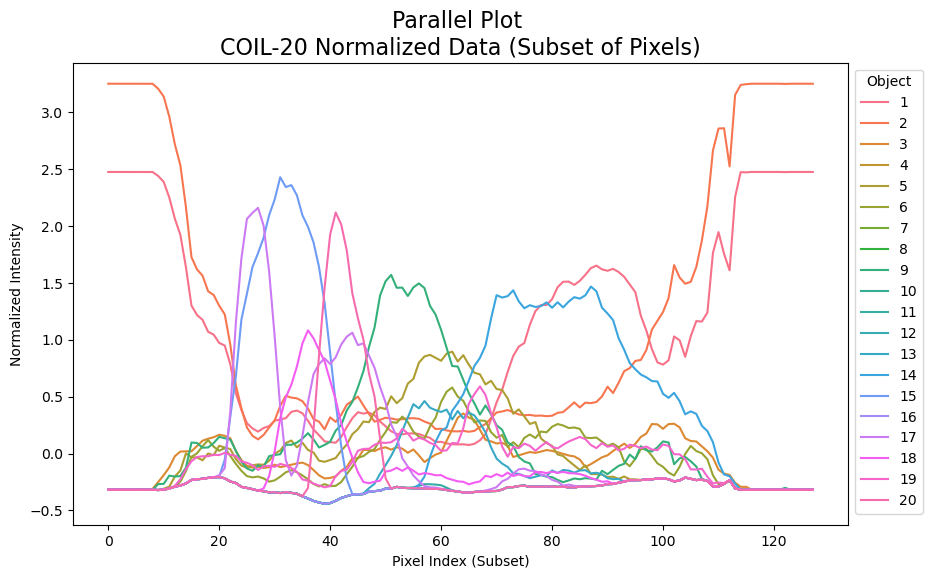

In [45]:
subset_idx = np.random.choice(coil_normalized.shape[0], 100, replace=False)
coil_subset = coil_normalized[subset_idx]

unique_labels = sorted(np.unique(coil_labels), key=lambda x: int(x))
class_means = np.array([coil_normalized[coil_labels == label].mean(axis=0) for label in unique_labels])

selected_features = np.arange(0, coil_normalized.shape[1], 128)  # Adjust stride for COIL-20
class_means_subset = class_means[:, selected_features]

df = pd.DataFrame(class_means_subset.T, columns=unique_labels)

plt.figure(figsize=(10, 6))
parallel_plot = sns.lineplot(data=df, dashes=False, markers=False)

plt.title('Parallel Plot \nCOIL-20 Normalized Data (Subset of Pixels)', fontsize=16)
plt.xlabel("Pixel Index (Subset)")
plt.ylabel("Normalized Intensity")
plt.legend(title='Object', bbox_to_anchor=(1, 1)) 
plt.show()

### High Dimensionality and PCA

#### MNIST Dataset

In [30]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

def plot_pca(scores, loadings, labels, title, colors):
    # plotting the pca results
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(scores[:, 0], scores[:, 1], c=labels, alpha=0.5, cmap=colors)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    # class means markers
    unique_labels = np.unique(labels)
    class_means = np.array(compute_class_means(scores, labels, unique_labels, (2,)))

    plt.scatter(class_means[:, 0], class_means[:, 1], c=unique_labels, cmap=colors,
                s=200, edgecolor='k', marker='D', label='Class Means')

    # red arrows to check variance
    for i, (x, y) in enumerate(loadings):
        plt.arrow(0, 0, x, y, color='r', width=0.01, head_width=0.05)
        plt.text(x * 1.2, y * 1.2, f"Pixel{i}", color='r')

    cbar = plt.colorbar(scatter, ticks=np.arange(len(unique_labels)), cmap=colors)
    cbar.set_label('Digit')
    cbar.set_ticklabels(np.arange(len(unique_labels)))

    plt.title(title)
    plt.legend()
    plt.show()

Let us start by plotting the `mnist` dataset.

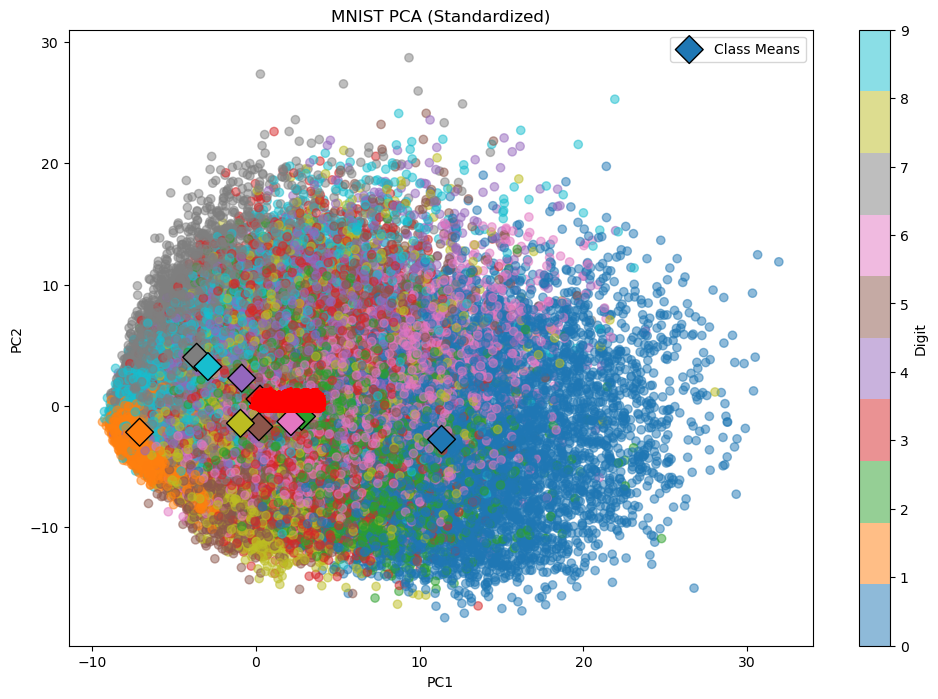

In [31]:
# pca computations, two components
pca_mnist = PCA(n_components=2)
scores = pca_mnist.fit_transform(mnist_normalized)
loadings = pca_mnist.components_.T * np.sqrt(pca_mnist.explained_variance_)

plot_pca(scores, loadings, mnist_labels, "MNIST PCA (Standardized)", "tab10")

From the principal components extracted and the red arrows points, we notice that the zero shape is the most influential in placing the numbers. The data still is quite packed, but we can notice some clusters, particularly for the numbers 0, 1 and 7.

We can already notice how the pca has divided the data so that 7 is closer to 1 than to 0, and most of the numbers fall between the two extremes.

Very little variance exists between the different data points, as they are all tightly clustered together, let us see how we can amend to this.

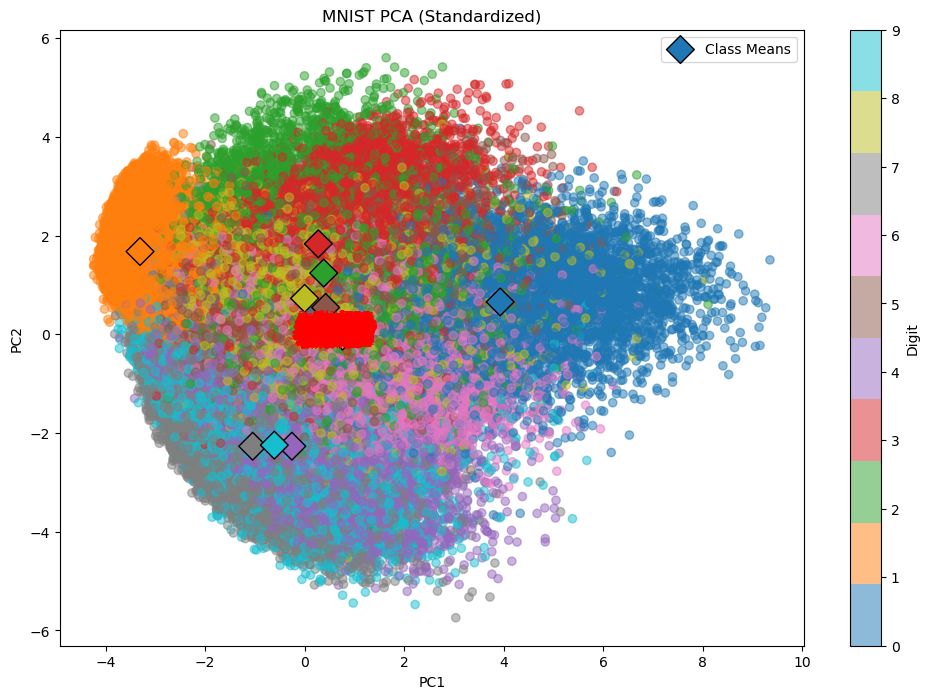

In [32]:
mnist_norm_minmax = mnist_flat / 255.0 

pca_mnist = PCA(n_components=2)
scores = pca_mnist.fit_transform(mnist_norm_minmax)
loadings = pca_mnist.components_.T * np.sqrt(pca_mnist.explained_variance_)

plot_pca(scores, loadings, mnist_labels, "MNIST PCA (Standardized)", "tab10")

The data now is noticeably more separated than before, with the meshing being severe mostly between the numbers 4, 9 and to a lesser extent 5, which is to be expected given their shape similarity.

We can go a step further and increase the number of components.

In [46]:
pca_mnist = PCA(n_components=3)
scores = pca_mnist.fit_transform(mnist_norm_minmax)
loadings = pca_mnist.components_.T * np.sqrt(pca_mnist.explained_variance_)

In [52]:
from mpl_toolkits.mplot3d import Axes3D  

def plot_pca_3d(scores, loadings, labels, title, colors):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of PCA scores
    scatter = ax.scatter(scores[:, 0], scores[:, 1], scores[:, 2], 
                         c=labels, alpha=0.5, cmap=colors)

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    # Red arrows for loadings
    for i, (x, y, z) in enumerate(loadings):
        ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)
        ax.text(x * 1.2, y * 1.2, z * 1.2, f"Pixel{i}", color='r')

    # Colorbar
    cbar = fig.colorbar(scatter, ticks=np.arange(len(unique_labels)), shrink=0.6)
    cbar.set_label('Digit')
    cbar.set_ticklabels(np.arange(len(unique_labels)))

    ax.set_title(title)
    plt.legend()
    plt.show()

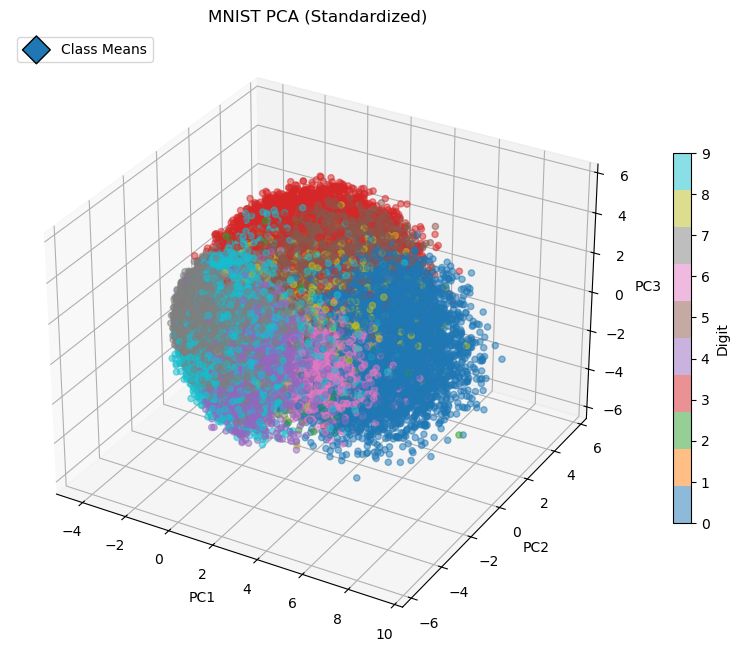

In [49]:
plot_pca_3d(scores, loadings, mnist_labels, "MNIST PCA (Standardized)", "tab10")

We can observe a bit of distinction but not by a large margin, the variance is still fairly low

In [51]:
pca_mnist.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531])

#### COIL-20 Dataset

/home/aries/.conda/envs/git-2d/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


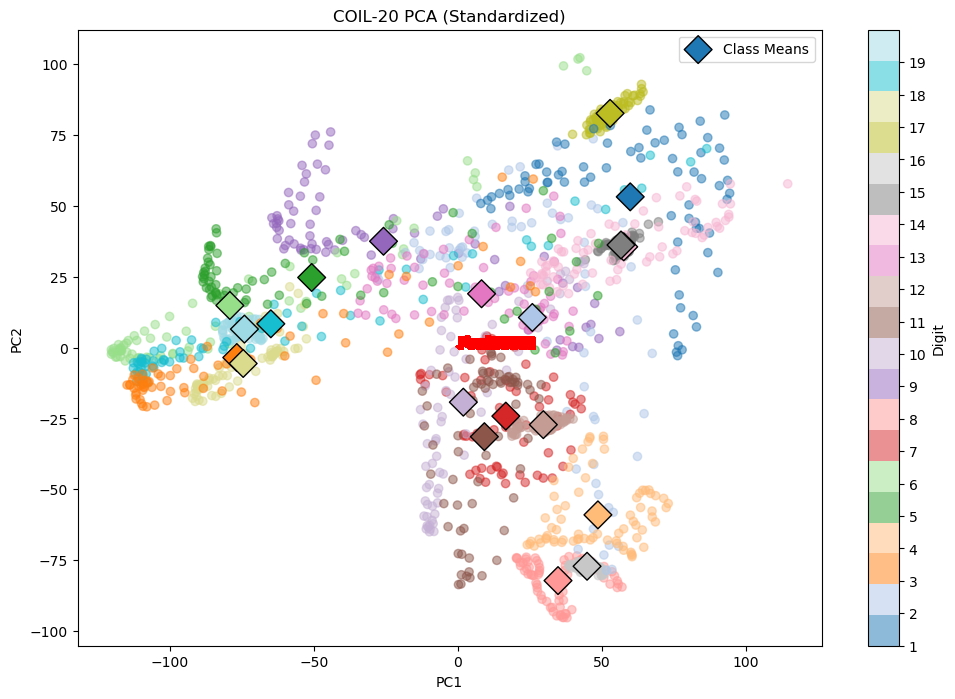

In [33]:
from matplotlib.lines import Line2D

# Assuming coil_normalized and coil_labels are already defined
pca_coil = PCA(n_components=2)
scores = pca_coil.fit_transform(coil_normalized)
loadings = pca_coil.components_.T * np.sqrt(pca_coil.explained_variance_)

coil_labels_numeric = np.array([int(label) for label in coil_labels])
plot_pca(scores, loadings, coil_labels_numeric, "COIL-20 PCA (Standardized)", "tab20")

The data for the coil-20 dataset is noticeably more varied and less clustered, with close values sticking together.

Let us test how it will behave for 3 pca components.

/tmp/ipykernel_36555/1424075774.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/home/aries/.conda/envs/git-2d/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


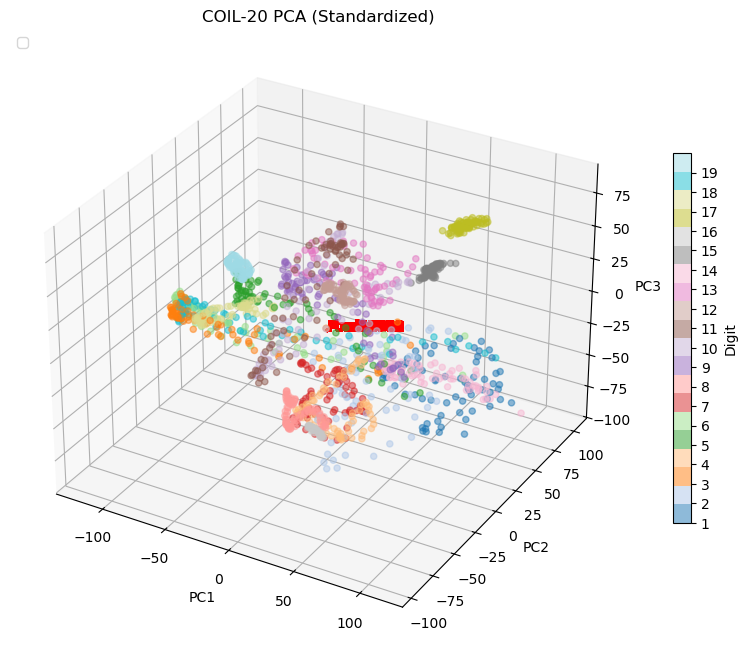

In [53]:
pca_coil = PCA(n_components=3)
scores = pca_coil.fit_transform(coil_normalized)
loadings = pca_coil.components_.T * np.sqrt(pca_coil.explained_variance_)

plot_pca_3d(scores, loadings, coil_labels_numeric, "COIL-20 PCA (Standardized)", "tab20")

We can see that some of the data has been clearly separated, reducing the variance. 

However some clusters, especially for object 18, are too scattered.

### Dimension Reduction using t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne_mnist = TSNE(n_components=2, random_state=42)
scores = tsne.fit_transform(mnist_normalized)
tsne.kl_divergence_

In [ ]:
tsne_mnist = TSNE(n_components=2, random_state=42)
scores = tsne_mnist.fit_transform(mnist_norm_minmax)
tsne_mnist.kl_divergence_